# Import Libraries

In [2]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler



# Read Dataset

In [3]:
df = pd.read_csv("Most Streamed Spotify Songs 2024.csv", encoding="ISO-8859-1")
print(df.head())

df

                        Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC All Time Rank  Track Score Spotify Streams  \
0    4/26/2024  QM24S2402528             1        725.4     390,470,936   
1     5/4/2024  USUG12400910             2        545.9     323,703,884   
2    3/19/2024  QZJ842400387             3        538.4     601,309,283   
3    1/12/2023  USSM12209777             4        444.9   2,031,280,633   
4    5/31/2024  USUG12403398             5        423.3     107,034,922   

  Spotify Playlist Count Spotify Playlist Reach  ...  SiriusXM Spins  \
0 

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


# Dataset Basic Information

In [4]:
df.info()
print("\nDuplicate Rows:", df.duplicated().sum())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [5]:
df.dtypes

Track                          object
Album Name                     object
Artist                         object
Release Date                   object
ISRC                           object
All Time Rank                  object
Track Score                   float64
Spotify Streams                object
Spotify Playlist Count         object
Spotify Playlist Reach         object
Spotify Popularity            float64
YouTube Views                  object
YouTube Likes                  object
TikTok Posts                   object
TikTok Likes                   object
TikTok Views                   object
YouTube Playlist Reach         object
Apple Music Playlist Count    float64
AirPlay Spins                  object
SiriusXM Spins                 object
Deezer Playlist Count         float64
Deezer Playlist Reach          object
Amazon Playlist Count         float64
Pandora Streams                object
Pandora Track Stations         object
Soundcloud Streams             object
Shazam Count

# Data Pre Processing

In [6]:
# Load the dataset
file_path = "Most Streamed Spotify Songs 2024.csv"
df = pd.read_csv(file_path, encoding="latin1")

# Selecting relevant numerical features
features = [
    "Spotify Streams",
    "Spotify Playlist Count",
    "Spotify Playlist Reach",
    "Shazam Counts",
    "Pandora Streams",
    "Soundcloud Streams",
    "YouTube Views",
    "TikTok Views",
    "Explicit Track"
]

# Converting columns to numeric (handling commas and missing values)
for col in features:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

print("\nMissing Values Before Processing:")
print(df[features].isna().sum())

# Handling missing values by filling with the median
df.fillna(df[features].median(), inplace=True)

print("\n✅ Missing Values After Processing:")
print(df[features].isna().sum())

# Standardizing the features (important for clustering)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Create a new DataFrame with scaled values
df_scaled = pd.DataFrame(scaled_features, columns=features)

# Save the prepared data to a new CSV file
df_scaled.to_csv("Prepared_Spotify_Data.csv", index=False)



Missing Values Before Processing:
Spotify Streams            113
Spotify Playlist Count      70
Spotify Playlist Reach      72
Shazam Counts              577
Pandora Streams           1106
Soundcloud Streams        3333
YouTube Views              308
TikTok Views               981
Explicit Track               0
dtype: int64

✅ Missing Values After Processing:
Spotify Streams           0
Spotify Playlist Count    0
Spotify Playlist Reach    0
Shazam Counts             0
Pandora Streams           0
Soundcloud Streams        0
YouTube Views             0
TikTok Views              0
Explicit Track            0
dtype: int64


In [7]:
df_scaled.describe()

,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Shazam Counts,Pandora Streams,Soundcloud Streams,YouTube Views,TikTok Views,Explicit Track
count,4.600000e+03,4.600000e+03,4600.000000,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03
mean,2.471453e-17,-4.942906e-17,0.000000,1.235726e-17,-3.089316e-17,-1.853590e-17,4.942906e-17,6.178632e-18,8.186688e-17
std,1.000109e+00,1.000109e+00,1.000109,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00
min,-8.302767e-01,-8.346920e-01,-0.786671,-4.087357e-01,-4.555089e-01,-3.643127e-01,-5.665398e-01,-1.855488e-01,-7.482318e-01
25%,-6.929044e-01,-7.353864e-01,-0.620206,-3.578917e-01,-4.381101e-01,-1.815015e-01,-4.993938e-01,-1.676350e-01,-7.482318e-01
50%,-3.800236e-01,-3.773985e-01,-0.336851,-2.581175e-01,-3.703617e-01,-1.815015e-01,-3.487839e-01,-1.346946e-01,-7.482318e-01
75%,3.173780e-01,3.669710e-01,0.207493,-1.349344e-02,-1.433455e-01,-1.815015e-01,5.097596e-02,-6.512109e-02,1.336484e+00
max,7.207025e+00,7.520908e+00,8.113183,3.832953e+01,9.329808e+00,1.776815e+01,2.340599e+01,4.441791e+01,1.336484e+00


# Elbow Method

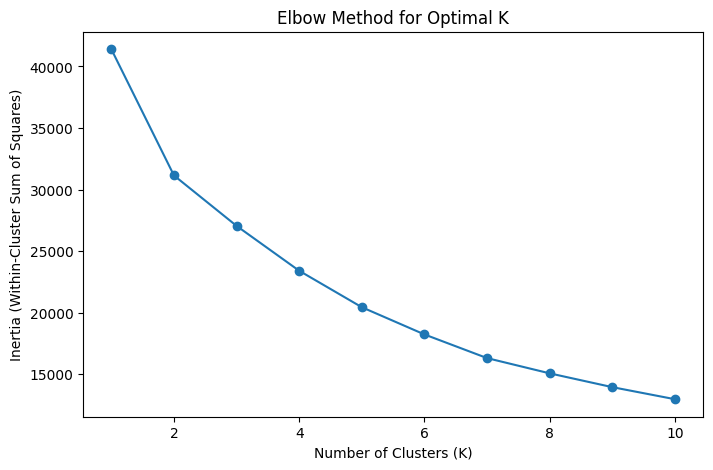

In [8]:
from sklearn.cluster import KMeans
# Finding the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal K")
plt.show()

# K Means

In [9]:
# Function to perform clustering and evaluate results
def perform_clustering(k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, labels)
    print(f"For K = {k}, Silhouette Score: {silhouette_avg:.4f}")
    return labels

# Run K-Means for K=2 and K=4
labels_k2 = perform_clustering(4)

# Plot the silhouette scores for comparison
k_values = [4]
silhouette_scores = [
    silhouette_score(scaled_features, labels_k2)
]

For K = 4, Silhouette Score: 0.3519


# Plotting the cluster

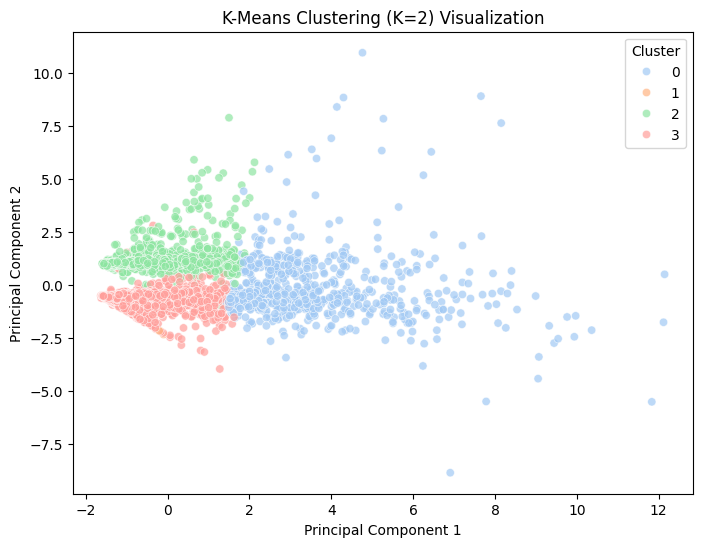

In [13]:
# Perform K-Means Clustering with K=2
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(scaled_features)

# Visualizing Clusters using PCA (reducing to 2D for plotting)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
df["PCA1"] = reduced_features[:, 0]
df["PCA2"] = reduced_features[:, 1]

# Plot Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="pastel", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering (K=2) Visualization")
plt.legend(title="Cluster")
plt.show()

# Save the clustered dataset
df.to_csv("Clustered_Spotify_Data_K2.csv", index=False)

# Summary of the cluster

In [14]:
# Calculating average statistics for each cluster
cluster_summary = df.groupby("Cluster")[features].mean()

# Displaying the summary statistics for the clusters
print(cluster_summary)

         Spotify Streams  Spotify Playlist Count  Spotify Playlist Reach  \
Cluster                                                                    
0           1.401120e+09           183703.666415            6.518579e+07   
1           1.390205e+07            10056.500000            2.516422e+06   
2           3.121898e+08            51717.775517            1.856061e+07   
3           2.636456e+08            30101.858866            1.474199e+07   

         Shazam Counts  Pandora Streams  Soundcloud Streams  YouTube Views  \
Cluster                                                                      
0         8.982131e+06     2.923522e+08        1.371073e+07   1.048521e+09   
1         9.051195e+05     6.421603e+06        3.224599e+06   9.530248e+06   
2         1.205093e+06     3.396248e+07        8.112548e+06   1.720652e+08   
3         1.198825e+06     2.850995e+07        3.509260e+06   3.344934e+08   

         TikTok Views  Explicit Track  
Cluster                           